# Intro to reading text files

Sometimes we need to read data from files. In general, these will be text files or binary files. Text files are easy to read, binary files are not.

Let's start with writing and then reading a bit of text.

In [ ]:
with open('../data/myfile.txt', 'w') as f:
    f.write('My text data.')

Now we can read this data:

In [ ]:
with open('../data/myfile.txt', 'r') as f:
    data = f.read()
data

In [3]:
# Only get into this if it comes up, or return to it later. It's likely too
# much information for now.
# The file is closed correctly, even with the error happening inside the block.
with open('../data/myfile.txt', 'r') as f:
    print(f'File is closed: {f.closed}.')
    x = 1 / 0
# This errors out. You can't follow it with more commands because they won't be run.

File is closed: False.


ZeroDivisionError: division by zero

In [4]:
print(f'File is closed: {f.closed}.')

File is closed: True.


## File modes

You have to decide what you want to do with the file.

- **`r`** &mdash; read only (default)
- **`r+`** &mdash; read and write (pointer at 0 &mdash; careful to manage the pointer!)
- **`x`** &mdash; open for exclusive creation, failing if the file already exists (add `+` for read and write)
- **`w`** &mdash; write new file **and clobbers existing file if it already exists**
- **`a`** &mdash; append existing

You can also add another letter to indicate whether you're handling text or bytes:

- **`t`** &mdash; text (default)
- **`b`** &mdash; bytes

For example, to open an existing text file for appending data to the end:

    with open(fname, 'at') as f:
        f.write('New data')

## Read some data

The data for these exercises were generated from the following USGS dataset: https://pubs.usgs.gov/dds/dds-033/USGS_3D/ssx_txt/3dstart.htm

We're going to read data from some specially formatted TOPS files. Let's check one out:

#### Note to instructors

The 55 files are of two types:

- Filenames starting `UWI_`, which have `#` as comments and `','` as the delimiter.
- Filenames without `UWI_`, which have `%` as the comment character and are TAB-delimited.

For both types:

- Units can be in feet or metres. (Coordinates are always in metres.)
- Formation names can be in order or not.
- If a file's units are `M`, then the porosities are v/v, otherwise they are percent. 

In [1]:
fname = '../data/sussex/UWI_4900523013.tops'

with open(fname, 'r') as f:
    data = f.read()

In [2]:
data

'# LOC: 38190.00 M,-32884.00 M\n# KB: 1577.34 M\n# TD: 3419.86 M\n# UNITS: M\n# Formations\nArdmore,2510.03\nCody,2521.61\nSussex Upper Top,2521.61\nSussex Lower Top,2527.71\nSussex Lower Base,2528.62\nSussex Upper Base,2529.54\nNiobrara,2530.75\n# Porosity\n2521.31,0.184\n2521.92,0.219\n2522.52,0.145\n2523.13,0.150\n2523.74,0.135\n2524.35,0.125\n2524.96,0.140\n2525.57,0.155\n2526.18,0.155\n2526.79,0.140\n2527.40,0.160\n2528.01,0.125\n2528.62,0.106\n2529.23,0.057\n2529.84,0.087\n2530.45,0.067\n2531.06,0.087\n2531.67,0.096\n'

In [ ]:
print(data)

In [ ]:
with open(fname, 'r') as f:
    lines = f.readlines()

In [ ]:
lines

We can also use this pattern:

In [ ]:
with open(fname, 'r') as f:
    for line in f:
        print(line, end='')

We can get at the filename too, which can be useful:

In [ ]:
from os import path

with open(fname, 'r') as f:
    print(path.basename(fname))
    print(19 * '=')
    for line in f:
        print(line, end='')

### EXERCISE

- Write a `for` loop to read the lines of the file one by one. <a title="Use either f.readlines() OR for line in f:">**HINT**</a>
- Find the line containing `TD:` print the quantity (depth plus units) from it. <a title="Use the keyword 'in' to check for the substring 'TD:' then use the string method split(':') on what you find.">**HINT**</a>
- You should add `break` after your print statement, as Python can stop reading the file at that point.

Once you have that working, try this:

- Use the `clean_quantity()` function you wrote before to split this quantity into value and units.
- Print these out together.

In [ ]:
# YOUR CODE HERE



In [ ]:
# Load this from utils if possible.
def clean_quantity(quantity):
    """Clean the units from a number."""
    if 'm' in quantity.lower():
        units = 'M'
    elif 'f' in quantity.lower():
        units = 'FT'
    else:
        units = None

    stripped = quantity.lower().strip(' .mft\n\t')
    value = stripped.replace(',', '')

    return float(value), units

# Build this up gradually.
with open(fname, 'r') as f:
    for line in f:
        if 'TD:' in line:
            _, quantity = line.split(':')
            depth, units = clean_quantity(quantity)
            print(depth, units)
            break

### EXERCISE

Turn your code into a function that takes the filename as an argument. Return the value and the units.

Don't forget the docstring!

In [ ]:
# YOUR CODE HERE



In [ ]:
def get_td(fname):
    """
    Read a single TOPS file and return the TD with its units.
    """
    with open(fname, 'r') as f:
        for line in f:
            if 'TD:' in line:
                _, quantity = line.split(':')
                depth, units = clean_quantity(quantity)
                break
    return depth, units

get_td(fname)

Let's check another file:

In [ ]:
get_td('../data/sussex/UWI_4900523863.tops')

### EXERCISE

Change your function so that I can specify the units I want as an argument. Then do any necessary conversion and return the depth only. Return the depth with the units it is measured in (irrespective of how it was stored in the file).

In [ ]:
# YOUR CODE HERE



In [2]:
fname = '../data/sussex/UWI_4900523013.tops'

In [9]:
# STEP 1
def get_td(fname):
    """
    Read a single TOPS file and return the TD with units.
    """
    with open(fname, 'r') as f:
        for line in f:
            if 'TD:' in line:
                _, quantity = line.split(':')
                td, source_units = clean_quantity(quantity)
                break
                
    source_units = source_units.upper()

    return td, source_units

get_td(fname)

(3419.86, 'M')

In [19]:
# STEP 2
def get_td(fname, target_units='M'):
    """
    Read a single TOPS file and return the TD in the specified units.
    """
    with open(fname, 'r') as f:
        for line in f:
            if 'TD:' in line:
                _, quantity = line.split(':')
                td, source_units = clean_quantity(quantity)
                break
                
    source_units, target_units = source_units.upper(), target_units.upper()

    # One way:
    if (source_units == 'M') and (target_units == 'FT'):
        td *=  1 / 0.3048
    elif (source_units == 'FT') and (target_units == 'M'):
        td *=  0.3048
    # ================

    # Alternative way:            
    convert = {
        ('M', 'FT'): 1 / 0.3048,
        ('FT', 'M'): 0.3048,
    }
    td *= convert.get((source_units, target_units), 1)
    # ================

    return td, target_units

get_td(fname)

(3419.86, 'M')

In [20]:
get_td('../data/sussex/UWI_4900523863.tops', target_units='FT')

# Should be 8188 ft.

(8188.0, 'FT')

## Reading multiple files

Sometimes you will want to read a lot of files from disk, perhaps even from multiple directories. The easiest way to do this is with the built-in library `glob`, which accept POSIX-style paths, with wildcards etc. [Read about these.](https://tldp.org/LDP/GNU-Linux-Tools-Summary/html/x11655.htm)

`glob.glob(path)` returns a list of filenames.

In [ ]:
from glob import glob

for fname in glob('../data/sussex/UWI*.tops'):
    print(fname)

This is just a list of path strings, so you can loop over it to read multiple files. It supports all the usual syntax for UNIX-style globbing, including recursion over directories with `**`. 

There are other options too, for example `os.walk()` allows you to 'walk' an entire branch of the file system. People often use this with `fnmatch.fnmatch()` for POSIX-like filename matching.

There's also `os.listdir()` which is the fastest of these options. Unlike `glob.glob()` is returns filenames only, not paths, so you will have to construct the path yourself to read a file.

In [ ]:
import os

for fname in os.listdir('../data/sussex'):
    if 'UWI' in fname:
        print(fname)

### EXERCISE

Write a new function to visit all of the TOPS files in the `sussex` directory. Make a histogram of the TDs (total depths of the wells) from all TOPS files you find (both ones starting with `UWI_` and those that don't).

You will need to cope with the fact that the TD might be missing from a file. You can do this in the new function, or back in the `get_td` function.

You should end up with 55 values.

In [ ]:
# YOUR CODE HERE



In [21]:
# Start with the same function as before.
def get_td(fname, target_units='M'):
    """
    Read a single TOPS file and return the TD in the specified units.
    """
    with open(fname, 'r') as f:
        td, source_units = None, None  # <-- Set defaults in case TD not found.
        for line in f:
            if 'TD:' in line:
                _, quantity = line.split(':')
                td, source_units = clean_quantity(quantity)
                break
                
    if td is not None:
        source_units, target_units = source_units.upper(), target_units.upper()

        convert = {
            ('M', 'FT'): 1 / 0.3048,
            ('FT', 'M'): 0.3048,
        }
        td *= convert.get((source_units, target_units), 1)

    return td, target_units

get_td(fname)

(3419.86, 'M')

In [22]:
import glob

In [23]:
def get_all_tds(path):
    """
    Read all files in a POSIX path and return them in a list.
    """
    tds = []
    for fname in glob.glob(path):
        td, units = get_td(fname)
        if td is not None:
            tds.append(td)
    return tds

tds = get_all_tds('../data/sussex/*.tops')

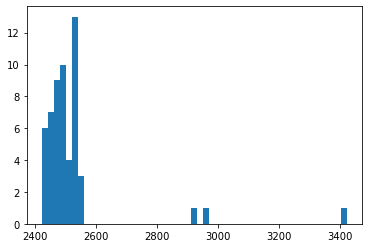

In [24]:
import matplotlib.pyplot as plt

_ = plt.hist(tds, bins=51)

---

## CONTINUE to [Practice reading text files](Practice_reading_text_files.ipynb)

---

&copy; 2020 Agile Scientific